In [50]:
# === BASIC PYTHON LIBRARIES ===
import numpy as np  # Numpy is used for numerical operations and working with arrays in Python
import pandas as pd  # Pandas is used for data manipulation and analysis using DataFrames.(e.g., reading CSV files, handling tables with rows and columns).
import scipy as sp  # SciPy is a scientific computing library. It supports statistical tests, linear algebra, etc. Often used with NumPy.

# === DATA VISUALIZATION ===
import matplotlib.pyplot as plt  # Matplotlib is used to create visualizations like line plots, scatter plots, bar charts, etc.
import seaborn as sns  # Seaborn is a more advanced visualization library built on top of Matplotlib, great for statistical graphics like heatmaps and pairplots.

# === MACHINE LEARNING & PREPROCESSING (scikit-learn) ===
from sklearn.linear_model import LinearRegression  # For building linear regression models
from sklearn.preprocessing import OneHotEncoder  # For converting categorical variables into numeric using one-hot encoding
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets

# === STATISTICAL MODELING & DIAGNOSTICS (statsmodels) ===
import statsmodels.api as sm  # Core statsmodels API for building models and running statistical tests
from statsmodels.formula.api import ols  # Formula-based OLS regression (e.g., y ~ x1 + x2)

# Diagnostic tools for regression assumptions
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Checks for multicollinearity (VIF)
from statsmodels.stats.diagnostic import het_breuschpagan  # Breusch-Pagan test for heteroskedasticity
from statsmodels.stats.diagnostic import acorr_breusch_godfrey  # (Optional) Autocorrelation test
from statsmodels.stats.stattools import durbin_watson  # Tests for autocorrelation in residuals
from statsmodels.tools.tools import add_constant  # Adds intercept to feature set for OLS

# === OPTIONAL: TIME SERIES MODELING ===
import statsmodels.tsa.api as smt  # Tools for time series analysis (e.g., ARIMA, ACF, PACF)

# === OPTIONAL ALIASES (if needed later) ===
import statsmodels.stats.diagnostic as diag  # Short alias for diagnostic tools
import statsmodels.api as sms  # Optional alias, same as sm, used in some time series/statistics tasks


In [51]:
df = pd.read_csv("student-mat.csv", sep=';')

# This reads a CSV file named student-mat.csv.
# The file uses ; as the separator (common in European-style CSVs).
# df becomes your DataFrame (table of data).

In [52]:
(df.shape)

# Shows the shape of the dataset: number of rows (students) and columns (features).

(395, 33)

In [53]:
df.info()

# Displays data types of each column and shows if there are any missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [54]:
df.head()

# Displays the first 5 rows of the dataset.

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [55]:
df.describe()

# Provides summary statistics for numerical columns (mean, std, min, max, etc.).

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


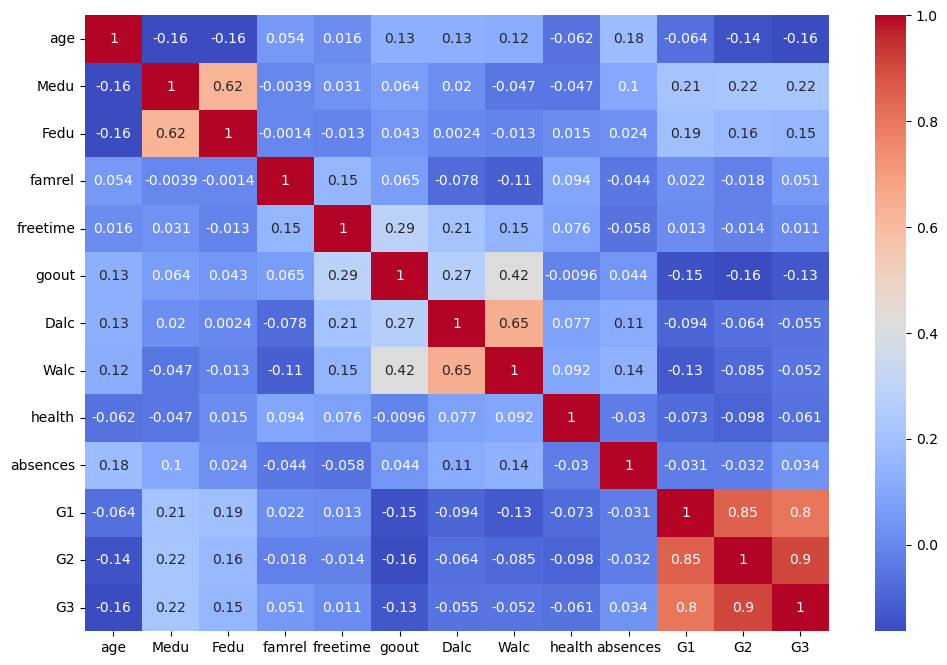

In [56]:
# Select numeric values
grades = df[['age',	'Medu','Fedu','famrel',	'freetime',	'goout','Dalc',	'Walc',	'health',	'absences','G1','G2', 'G3']]

# Select categorical values
plt.figure(figsize=(12,8)) # Set the figure size
ax = sns.heatmap(grades.corr(), cmap='coolwarm', annot=True) # Creates a heatmap showing how strongly each feature is related to others.
plt.show() # Displays the heatmap.

# The heatmap is a graphical representation of data where individual values are represented as colors.
# The 'coolwarm' color palette is used to show the correlation values.
# The annot=True parameter adds the correlation coefficient values to each cell in the heatmap.
# The correlation coefficient ranges from -1 to 1: 
# -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation.
# For example, if 'G3' (final grade) has a high positive correlation with 'G2' (previous grade), it suggests that students who did well in 'G2' are likely to do well in 'G3'.
# The heatmap also helps to identify multicollinearity, which occurs when two or more features are highly correlated with each other.
# This can be problematic in regression models as it can inflate the variance of the coefficient estimates.
# In this case, we can see that 'G1' and 'G2' are highly correlated with each other, which may indicate multicollinearity.
# We can also see that 'Dalc' (alcohol consumption during the week) has a negative correlation with 'G3', suggesting that higher alcohol consumption is associated with lower final grades.
# This is a common finding in educational datasets, where higher alcohol consumption is often associated with lower academic performance.

In [57]:
# Check for missing data
total = grades.isnull().sum().sort_values(ascending=False)

# This checks for missing values in the DataFrame and sorts them in descending order.
# The isnull() function returns a DataFrame of the same shape as grades, with True for missing values and False for non-missing values.
# The sum() function counts the number of True values (missing values) in each column.
# The sort_values(ascending=False) function sorts the counts in descending order, so the columns with the most missing values appear first.
# The result is stored in the variable total, which is a Series object with the column names as the index and the counts of missing values as the values.

# Display total
print(total)

age         0
Medu        0
Fedu        0
famrel      0
freetime    0
goout       0
Dalc        0
Walc        0
health      0
absences    0
G1          0
G2          0
G3          0
dtype: int64


In [58]:
grades.corr()[['G3']].sort_values(by='G3', ascending = False)

# Displays how strongly each feature is correlated with the final grade (G3).
# Sorted from most positively to most negatively correlated.
# Helps you choose which features are useful for prediction.

,G3
G3,1.000000
G2,0.904868
G1,0.801468
Medu,0.217147
Fedu,0.152457
famrel,0.051363
absences,0.034247
freetime,0.011307
Walc,-0.051939
Dalc,-0.054660


In [59]:
encoded_grades = OneHotEncoder().fit_transform(grades).toarray()

# Converts categorical features (if any) into binary vectors using one-hot encoding.
# This is necessary because machine learning models only work with numbers.
# toarray() converts the sparse matrix into a full NumPy array.

print(encoded_grades)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [60]:
(encoded_grades.shape)

(395, 134)

In [61]:
# Save encoded_students as pandas DataFrame
grades_df = pd.DataFrame(encoded_grades)

# Converts the encoded NumPy array back into a pandas DataFrame.
# Now it’s easier to work with and visualize.

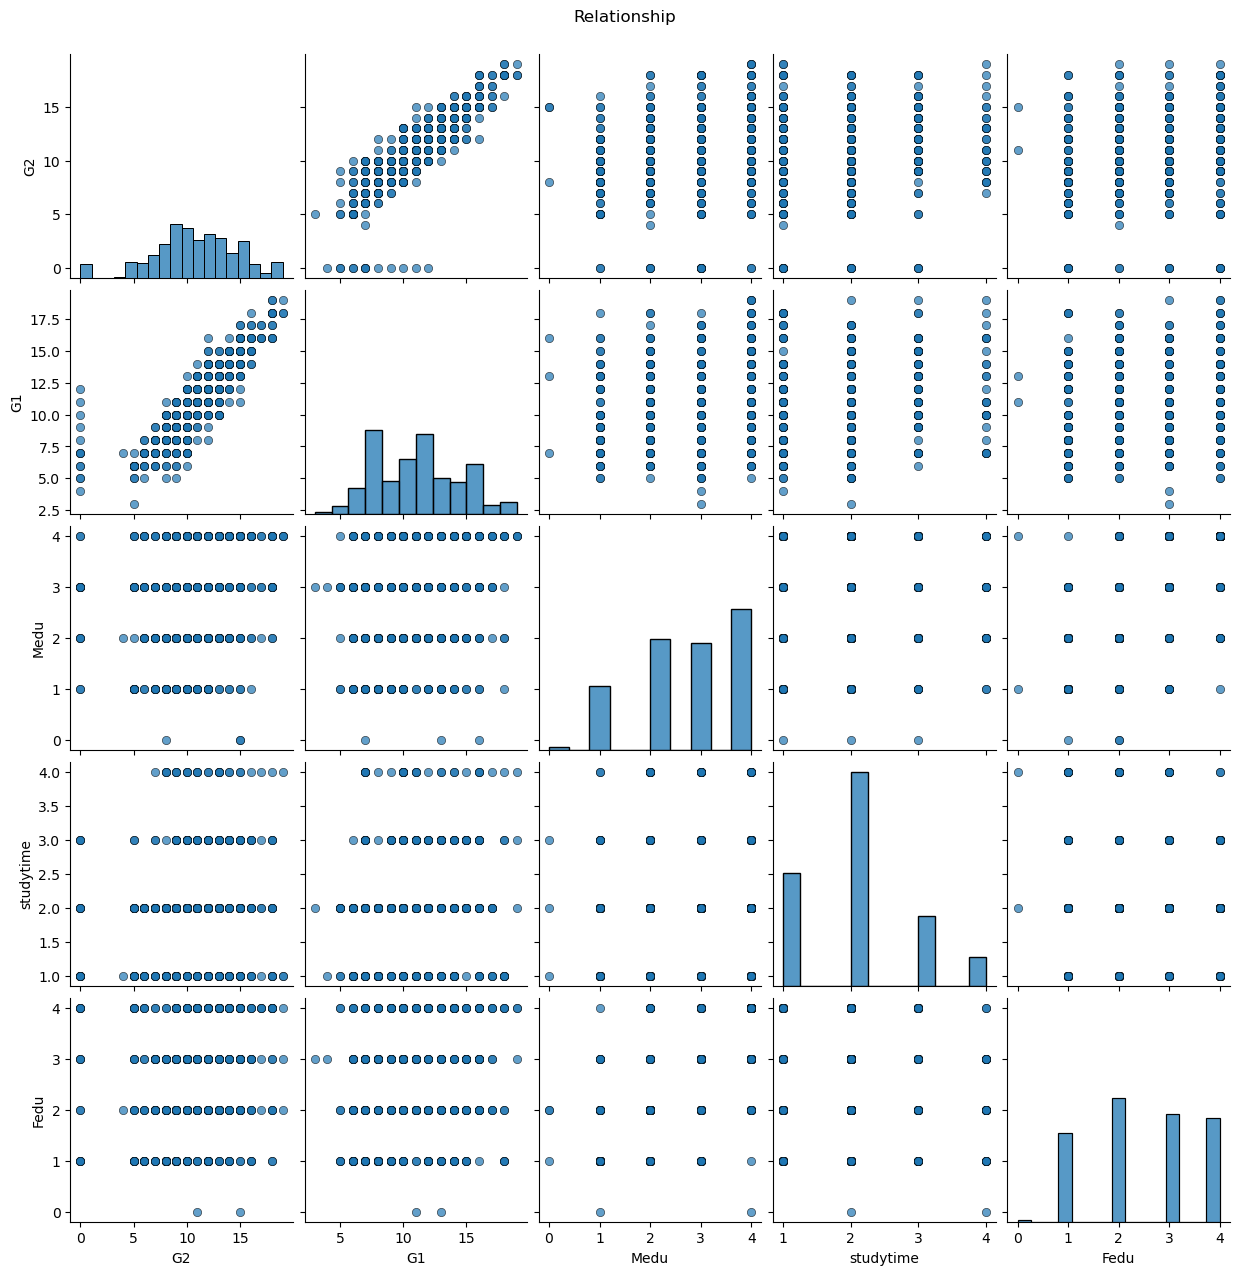

In [62]:
# Assuming df is your DataFrame
grades = df[['G2', 'G1', 'Medu', 'studytime', 'Fedu']]
# Selects specific columns from your main DataFrame df and stores them in a new variable called grades.



# Generate pairplot
sns.pairplot(grades, diag_kind='hist', kind='scatter', corner=False, plot_kws={'edgecolor':'k', 'alpha':0.7})
plt.suptitle('Relationship', y=1.02)
plt.show()

# Creates a pair plot using Seaborn to visualize relationships between all pairs of selected variables in the grades DataFrame.
# The diag_kind='hist' parameter specifies that histograms should be used on the diagonal.
# The kind='scatter' parameter specifies that scatter plots should be used for the off-diagonal plots.
# The corner=False parameter means that the upper triangle of the plot will also be shown.
# The plot_kws={'edgecolor':'k', 'alpha':0.7} parameter customizes the appearance of the scatter plots.
# The edgecolor='k' parameter sets the edge color of the points to black, and alpha=0.7 makes the points slightly transparent.
# The plt.suptitle('Relationship', y=1.02) line adds a title to the plot, with y=1.02 positioning it slightly above the plot.
# The plt.show() line displays the plot.
# The pair plot is useful for visualizing the relationships between multiple variables at once.
# It helps to identify patterns, correlations, and potential outliers in the data.

In [63]:
# Data Cleaning

df = pd.read_csv("student-mat.csv", sep=';')
df = df.drop(['school', 'sex', 'age', 'address'], axis=1)
df = pd.get_dummies(df, drop_first=True)

# This reads a CSV file named student-mat.csv.
# The file uses ; as the separator (common in European-style CSVs).
# df becomes your DataFrame (table of data).
# The drop() function removes the specified columns from the DataFrame.
# The axis=1 parameter indicates that we are dropping columns (axis=0 would indicate rows).
# The get_dummies() function converts categorical variables into dummy/indicator variables.
# The drop_first=True parameter means that the first category of each categorical variable will be dropped to avoid multicollinearity.
# This is useful when you have categorical variables with multiple levels.
# For example, if you have a column 'color' with values 'red', 'blue', and 'green', get_dummies() will create three new columns: 'color_red', 'color_blue', and 'color_green'.
# If drop_first=True, only 'color_blue' and 'color_green' will be kept, and 'color_red' will be dropped.
# This is because 'color_red' can be inferred from the other two columns.
# This is a common preprocessing step in machine learning to prepare the data for modeling.
# The cleaned DataFrame df now contains only the relevant features for analysis.

In [64]:
df.corr()[['G3']].sort_values(by='G3', ascending = False)

# Shows how strongly each variable correlates with G3 (the final grade), sorted from highest to lowest.

,G3
G3,1.000000
G2,0.904868
G1,0.801468
Medu,0.217147
higher_yes,0.182465
Fedu,0.152457
Mjob_health,0.116158
paid_yes,0.101996
internet_yes,0.098483
studytime,0.097820


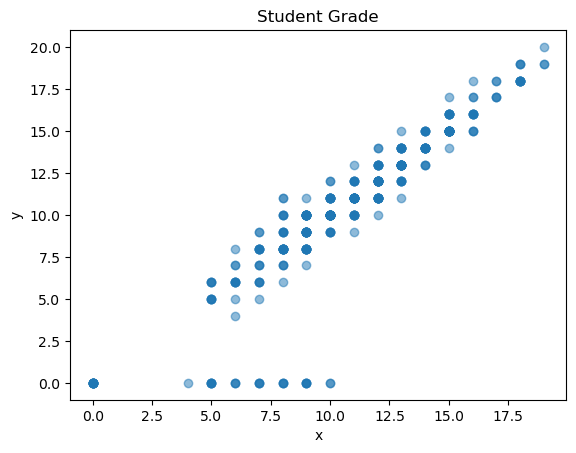

In [65]:
# Check linearity - section 2 Grade

X1 = df['G2']
y = df ['G3']
# Select G2 as the independent variable (x-axis) and G3 as the dependent variable (y-axis) for a simple linear regression.

# Plot
plt.scatter(X1,y, alpha=0.5)
plt.title('Student Grade')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Creates a scatter plot to visualize the relationship between G2 and G3.
# The x-axis represents G2 (the previous grade), and the y-axis represents G3 (the final grade).
# The alpha=0.5 parameter makes the points slightly transparent, which can help visualize overlapping points.
# The plt.title('Student Grade') line adds a title to the plot.

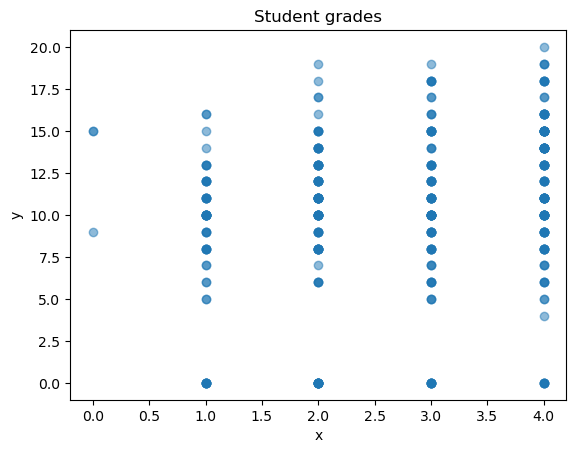

In [66]:
# Check linearity - Mother's education

X2 = df['Medu']
y = df['G3']

#Plot

plt.scatter(X2,y, alpha=0.5)
plt.title('Student grades')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

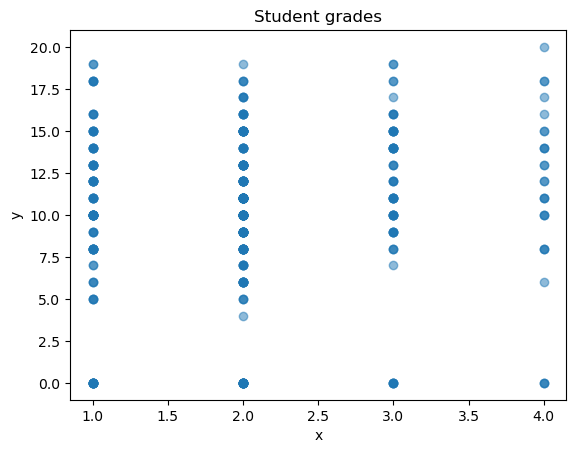

In [67]:
# Check Linearity - Study time
X2 = df['studytime']
y = df['G3']

# Plot
plt.scatter(X2,y, alpha=0.5)
plt.title('Student grades')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [68]:
X1 = sm.add_constant(X1)     # Add intercept
model = sm.OLS(y, X1).fit()
print(model.summary())

# This adds a constant (intercept) to the independent variable X1 (G2) for the OLS regression model.
# The sm.OLS(y, X1).fit() line fits an Ordinary Least Squares (OLS) regression model using the dependent variable y (G3) and the independent variable X1 (G2).
# The model.summary() line prints a summary of the regression results, including coefficients, R-squared value, p-values, and other statistics.
# The summary provides insights into the relationship between G2 and G3, including how well G2 predicts G3.
# The R-squared value indicates how much of the variance in G3 can be explained by G2.
# The coefficients indicate the strength and direction of the relationship between G2 and G3.
# The p-values indicate whether the coefficients are statistically significant.
# A low p-value (typically < 0.05) indicates that the relationship is statistically significant.
# The summary also includes diagnostic statistics like the F-statistic, which tests the overall significance of the model.
# The Durbin-Watson statistic tests for autocorrelation in the residuals.
# The model summary is a comprehensive overview of the regression analysis and helps to understand the relationship between the independent and dependent variables.

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     1776.
Date:                Sat, 17 May 2025   Prob (F-statistic):          7.63e-148
Time:                        15:35:00   Log-Likelihood:                -823.83
No. Observations:                 395   AIC:                             1652.
Df Residuals:                     393   BIC:                             1660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3928      0.297     -4.690      0.0

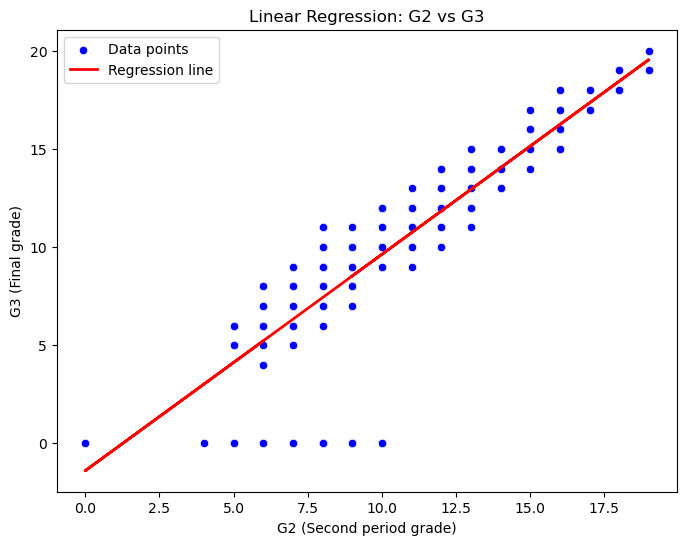

In [84]:
# Set the size of the figure to 8 inches wide by 6 inches tall
plt.figure(figsize=(8,6))

# Create a scatter plot of actual data points: x = G2 grades, y = G3 grades
sns.scatterplot(x=df['G2'], y=df['G3'], color='blue', label='Data points')

# Plot the regression line using the predicted G3 values from the model
plt.plot(df['G2'], model.predict(X1), color='red', linewidth=2, label='Regression line')

# Label the x-axis
plt.xlabel('G2 (Second period grade)')

# Label the y-axis
plt.ylabel('G3 (Final grade)')

# Set the title of the plot
plt.title('Linear Regression: G2 vs G3')

# Display a legend to differentiate data points and the regression line
plt.legend()

# Display the complete plot
plt.show()


In [75]:
# Import additional libraries for diagnostic tests and numerical operations
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# ------------------------------------------
# i. Breusch-Pagan test for heteroscedasticity
# ------------------------------------------

# GOAL : To check if the error variance is constant (which is a good thing).
# We want the p-value to be high (typically above 0.05) to confirm that errors are evenly spread.

# Get the residuals (errors) from the model
residuals = model.resid

# Get the explanatory variables used in the model (including the constant)
exog = model.model.exog

# Perform the Breusch-Pagan test to check for heteroscedasticity
bp_test = het_breuschpagan(residuals, exog)

# Define labels for the test result output
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

# Print the results of the Breusch-Pagan test
# A high p-value (> 0.05) indicates homoscedasticity (good), 
# while a low p-value indicates heteroscedasticity (bad)
print("\nBreusch-Pagan test results:")
for name, value in zip(labels, bp_test):
    print(f"{name}: {value}")

# For example: Studying more generally increases results — that’s what the regression trend shows.
# But heteroscedasticity is about whether those results become less predictable or more spread out as study increases.
# Homoscedasticity (Good): All dots are evenly spread around the trend line
# Heteroscedasticity (Bad): Dots are more spread out at higher values of study time, making predictions less reliable.


Breusch-Pagan test results:
Lagrange multiplier statistic: 15.010144171367559
p-value: 0.00010693481102634732
f-value: 15.524063521337172
f p-value: 9.639671041677489e-05


In [77]:
# ------------------------------------------
# ii. Calculate Variance Inflation Factor (VIF) for multicollinearity
# ------------------------------------------

# VIF measures multicollinearity — how much the predictors (X variables) are related to each other.
# GOAL : To check if features are too highly correlated with each other (which can distort regression results).
# How much one predictor (independent variable) is correlated with the others.
# High VIF = variable can be predicted from others → multicollinearity → unstable regression.
# You want the VIF to be low, typically:
# VIF < 5: Good
# 5 ≤ VIF < 10: Moderate concern
# VIF ≥ 10: Serious multicollinearity problem


print("\nVariance Inflation Factor (VIF):")

# Create a DataFrame to store VIF results
vif_data = pd.DataFrame()

# Add column for feature names
vif_data["feature"] = model.model.exog_names

# Calculate VIF for each feature
# VIF > 5 or 10 suggests multicollinearity
vif_data["VIF"] = [variance_inflation_factor(exog, i) for i in range(exog.shape[1])]

# Print the VIF values
print(vif_data)

# For example :
# Imagine a model predicting student result (G3) based on: studytime, hours_of_sleep, stress_level
# If studytime and hours_of_sleep are highly correlated (students who study more also sleep less in this dataset), their VIFs may be high.
# That means: The model is struggling to separate the effects of "studytime" and "sleep" on grades.
# So, one of them might need to be removed or adjusted to fix the multicollinearity.


Variance Inflation Factor (VIF):
  feature      VIF
0   const  9.13345
1      G2  1.00000


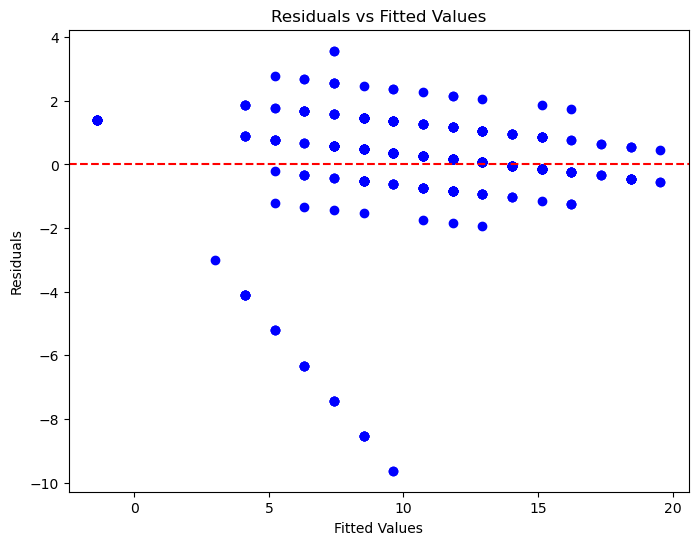

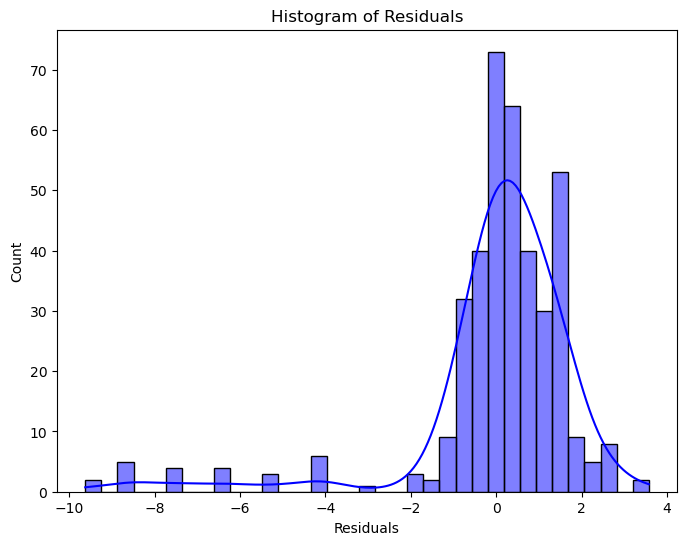

In [78]:
# ------------------------------------------
# iii. Plot residuals to check linear regression assumptions
# ------------------------------------------

# Plot residuals vs. fitted values
# This helps check for patterns — residuals should be randomly scattered
plt.figure(figsize=(8,6))
plt.scatter(model.fittedvalues, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # reference line at y=0
plt.xlabel('Fitted Values')  # Predicted values
plt.ylabel('Residuals')      # Model errors
plt.title('Residuals vs Fitted Values')
plt.show()

# Plot histogram of residuals to check for normality
# Normally distributed residuals support a valid regression model
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, color='blue')  # KDE adds a smooth curve
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()